<a href="https://colab.research.google.com/github/akshat5302/DPS_AI-Task/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
from prophet import Prophet


In [48]:
df = pd.read_csv('/content/file2.csv')
df.head()

,ds,y
0,2020-01-01,28.0
1,2020-02-01,40.0
2,2020-03-01,27.0
3,2020-04-01,26.0
4,2020-05-01,40.0


In [49]:
df.tail()

,ds,y
247,2000-08-01,77.0
248,2000-09-01,84.0
249,2000-10-01,83.0
250,2000-11-01,71.0
251,2000-12-01,85.0


In [50]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpix4y5un4/lz9m5b3m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpix4y5un4/_mm4bwsa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7239', 'data', 'file=/tmp/tmpix4y5un4/lz9m5b3m.json', 'init=/tmp/tmpix4y5un4/_mm4bwsa.json', 'output', 'file=/tmp/tmpix4y5un4/prophet_modeloi9z_xh9/prophet_model-20221028172128.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:21:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:21:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [51]:
df.tail()

,ds,y
247,2000-08-01,77.0
248,2000-09-01,84.0
249,2000-10-01,83.0
250,2000-11-01,71.0
251,2000-12-01,85.0


In [52]:
future = m.make_future_dataframe(periods=2,freq='M')
future.tail(), 

(            ds
 249 2020-10-01
 250 2020-11-01
 251 2020-12-01
 252 2020-12-31
 253 2021-01-31,)

In [53]:
future.head()

,ds
0,2000-01-01
1,2000-02-01
2,2000-03-01
3,2000-04-01
4,2000-05-01


In [54]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
249,2020-10-01,36.447943,27.202071,46.161825
250,2020-11-01,27.920271,18.530491,37.919872
251,2020-12-01,29.590025,19.210702,38.789589
252,2020-12-31,22.162282,12.841493,32.139834
253,2021-01-31,19.212191,9.306050,29.184869


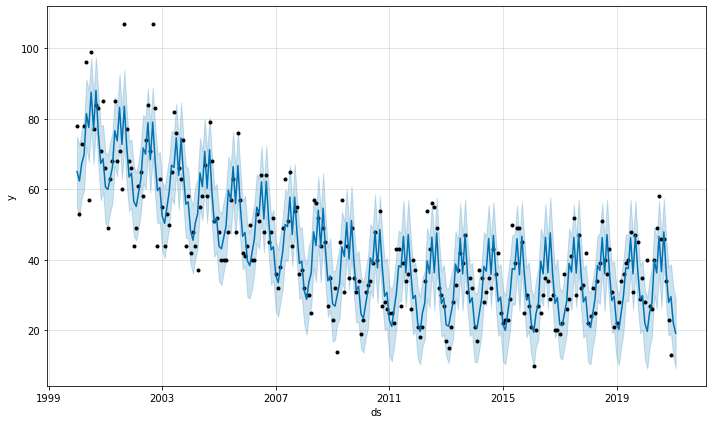

In [55]:
fig1 = m.plot(forecast)


In [56]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,76.007236,54.941853,74.958678,76.007236,76.007236,-10.938576,-10.938576,-10.938576,-10.938576,-10.938576,-10.938576,0.0,0.0,0.0,65.068660
1,2000-02-01,75.650536,52.189680,72.460706,75.650536,75.650536,-13.261260,-13.261260,-13.261260,-13.261260,-13.261260,-13.261260,0.0,0.0,0.0,62.389276
2,2000-03-01,75.316849,57.450998,76.798775,75.316849,75.316849,-8.053024,-8.053024,-8.053024,-8.053024,-8.053024,-8.053024,0.0,0.0,0.0,67.263825
3,2000-04-01,74.960149,59.856403,79.641726,74.960149,74.960149,-5.106110,-5.106110,-5.106110,-5.106110,-5.106110,-5.106110,0.0,0.0,0.0,69.854039
4,2000-05-01,74.614956,72.071938,91.218522,74.614956,74.614956,6.864981,6.864981,6.864981,6.864981,6.864981,6.864981,0.0,0.0,0.0,81.479936


In [61]:
forecast.iloc[-5]

ds                            2020-10-01 00:00:00
trend                                   33.047064
yhat_lower                              27.202071
yhat_upper                              46.161825
trend_lower                             33.047064
trend_upper                             33.047064
additive_terms                           3.400879
additive_terms_lower                     3.400879
additive_terms_upper                     3.400879
yearly                                   3.400879
yearly_lower                             3.400879
yearly_upper                             3.400879
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                    36.447943
Name: 249, dtype: object

In [58]:

1#Saving the model

1

In [15]:
from prophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model

In [16]:
with open('serialized_model.json', 'r') as fin:
    m = model_from_json(fin.read())  # Load model

In [20]:
forecast.to_csv('fcast.csv')

In [ ]:
df = pd.read_csv('/content/fcast.csv')

In [22]:
predictions=m.predict(df)

In [ ]:
import pickle
pkl_path = "/content/Prophet.pkl"
with open(pkl_path, "wb") as f:
    # Pickle the 'Prophet' model using the highest protocol available.
    pickle.dump(m, f)
future = m.make_future_dataframe(periods=2,freq='M')
forecast=m.predict(future)
forecast[ilo]


In [25]:
predictions.iloc[-1]['yhat']

19.212191339978148

In [18]:
predictions=m.predict(fcast)

NameError: ignored

In [ ]:
with open(pkl_path, 'rb') as f:
    m = pickle.load(f)

fcast = pd.read_pickle("/content/forecast.pkl")

In [ ]:
predictions=m.predict(fcast)

In [ ]:
predictions.iloc[253]

ds                            2021-01-31 00:00:00
trend                                   33.068409
yhat_lower                               9.221612
yhat_upper                              29.204811
trend_lower                             33.068409
trend_upper                             33.069047
additive_terms                         -13.856217
additive_terms_lower                   -13.856217
additive_terms_upper                   -13.856217
yearly                                 -13.856217
yearly_lower                           -13.856217
yearly_upper                           -13.856217
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                    19.212191
Name: 253, dtype: object

In [ ]:
type(forecast)

pandas.core.frame.DataFrame

In [ ]:
type(future)

pandas.core.frame.DataFrame

In [ ]:
fcast.type()

AttributeError: ignored

In [ ]:
type(fcast)

pandas.core.frame.DataFrame

In [ ]:
forecast.to_csv("forecastcsv.csv")

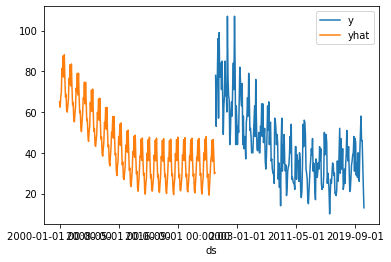

In [ ]:
pd.concat([df.set_index('ds')['y'],predictions.set_index('ds')['yhat']],axis=1).plot()

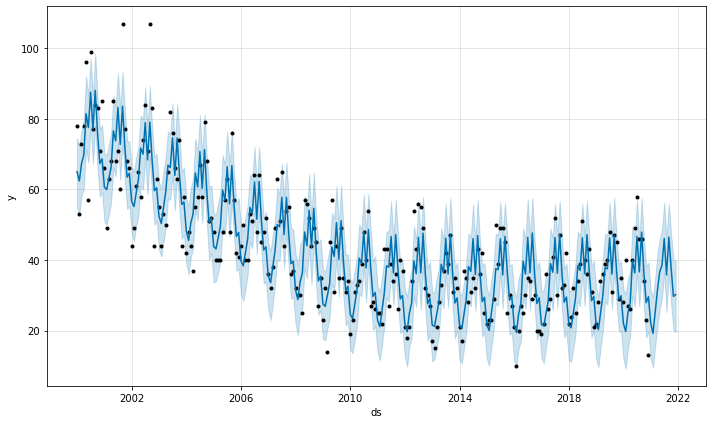

In [ ]:
fig = m.plot(fcast)

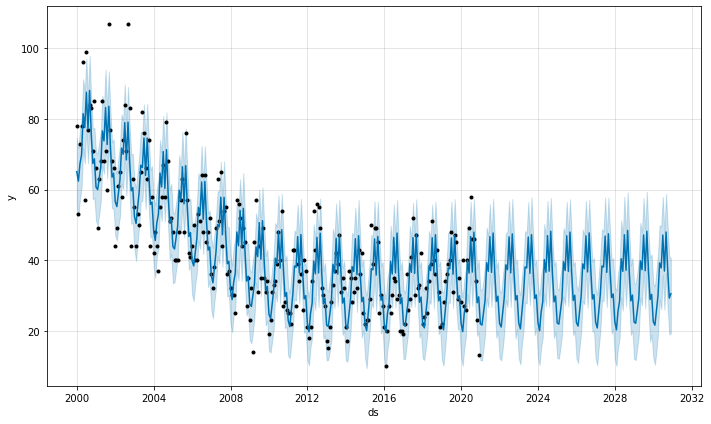

In [ ]:
future2 = m.make_future_dataframe(periods=120, freq='MS')
fcst2 = m.predict(future2)
fig = m.plot(fcst2)

In [ ]:
future2.shape

(372, 1)

In [ ]:
future.shape

(264, 1)

In [ ]:
fcst2.shape

(372, 16)

In [ ]:
fcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,76.007236,54.708155,74.509728,76.007236,76.007236,-10.938576,-10.938576,-10.938576,-10.938576,-10.938576,-10.938576,0.0,0.0,0.0,65.068660
1,2000-02-01,75.650536,53.200179,72.206236,75.650536,75.650536,-13.261260,-13.261260,-13.261260,-13.261260,-13.261260,-13.261260,0.0,0.0,0.0,62.389276
2,2000-03-01,75.316849,58.148695,76.587728,75.316849,75.316849,-8.053024,-8.053024,-8.053024,-8.053024,-8.053024,-8.053024,0.0,0.0,0.0,67.263825
3,2000-04-01,74.960149,60.258110,79.743172,74.960149,74.960149,-5.106110,-5.106110,-5.106110,-5.106110,-5.106110,-5.106110,0.0,0.0,0.0,69.854039
4,2000-05-01,74.614956,71.627563,92.051907,74.614956,74.614956,6.864981,6.864981,6.864981,6.864981,6.864981,6.864981,0.0,0.0,0.0,81.479936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,2021-07-31,33.100075,25.224156,46.009397,33.038792,33.169437,2.698777,2.698777,2.698777,2.698777,2.698777,2.698777,0.0,0.0,0.0,35.798852
260,2021-08-31,33.105498,36.243777,55.942317,33.031775,33.196362,13.398082,13.398082,13.398082,13.398082,13.398082,13.398082,0.0,0.0,0.0,46.503580
261,2021-09-30,33.110747,27.660767,47.320110,33.021390,33.226773,4.703169,4.703169,4.703169,4.703169,4.703169,4.703169,0.0,0.0,0.0,37.813916
262,2021-10-31,33.116170,20.186907,40.161125,33.010221,33.255435,-3.418186,-3.418186,-3.418186,-3.418186,-3.418186,-3.418186,0.0,0.0,0.0,29.697985
